<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=200 HEIGHT=200>
</div>
<div id="subject">
<CENTER>
<br>
<br>
<font size="5"></br> UVF4B - Projet : Séparation aveugle de sources</font></br></div>
</CENTER>
<CENTER>
<font size="3"></br>12th of November 2018</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">fatma.krichen@imt-atlantique.net</span>
</CENTER>
<CENTER>
<span style="color:blue">mohamed.bourkhiss@imt-atlantique.net</span>
</CENTER>
</div>

# BLIND SOURCE SEPARATION

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Illustration

### Distribution uniforme

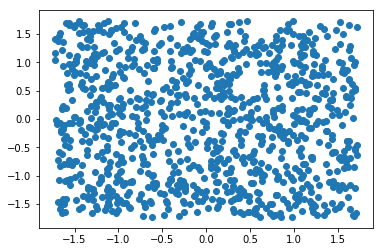

In [2]:
# generation de deux var uniformes s1 et s2
s1=np.random.uniform(-sqrt(3),sqrt(3),1000)
s2=np.random.uniform(-sqrt(3),sqrt(3),1000)
s=np.array([s1,s2])
# plot s1 et s2 dans le meme plan
# les deux variables sont décorrelées
plt.scatter(s1,s2)
plt.show()

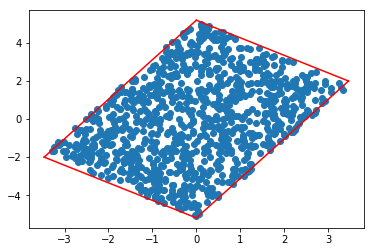

In [3]:
# x1 et x2 des combinaisons lineaires de s1 et s2
x1=s1+s2
x2=2*s2-s1
x=np.array([x1,x2])

plt.scatter(x1,x2)
# x1 et x2 ne sont pas indépendantes 
plt.plot([-2*sqrt(3),0],[-2,3*sqrt(3)],'r')
plt.plot([-2*sqrt(3),0],[-2,-3*sqrt(3)],'r')
plt.plot([2*sqrt(3),0],[2,3*sqrt(3)],'r')
plt.plot([2*sqrt(3),0],[2,-3*sqrt(3)],'r')
plt.show()

In [4]:
# indices extreme points
argmins = np.argmin(x, axis = 1)
argmaxs = np.argmax(x, axis = 1)

#
x_A_0 = x[:, argmins[0]] # left point
x_B_0 = x[:, argmaxs[1]] # high point
x_C_0 = x[:, argmaxs[0]] # right point
x_D_0 = x[:, argmins[1]] # low point

# Scatter extreme points
# import bokeh package
from bokeh.plotting import figure, show, output_notebook

# initialize figure
p = figure(plot_width=1300, plot_height=600)

# Scatter random realisations
p.scatter(x1, x2, marker="circle", size=10, line_color="navy", fill_color="navy", alpha=0.5)

p.line([x_A_0[0], x_B_0[0], x_C_0[0], x_D_0[0], x_A_0[0]], [x_A_0[1], x_B_0[1], x_C_0[1], x_D_0[1], x_A_0[1]], line_width=2, line_color = "red")
p.xaxis.axis_label = "S1"
p.yaxis.axis_label = "S2"

show(p)



In [5]:
# 
x_A_0 = x[:, argmins[0]]
s_A_0 = s[:, argmins[0]]

x_B_0 = x[:, argmaxs[1]]
s_B_0 = s[:, argmaxs[1]]


#
S = [s_A_0, s_B_0]
print(S)
x_sample_1 = [x_A_0[0], x_B_0[0]]
print (x_sample_1)
x_sample_2 = [x_A_0[1], x_B_0[1]]

#
A_estimation = np.array([list(np.linalg.solve(S, x_sample_1)), list(np.linalg.solve(S, x_sample_2))])
A_estimation

[array([-1.64306105, -1.65065105]), array([-1.60176544,  1.70010959])]
[-3.2937120970167015, 0.09834415170362387]


array([[ 1.,  1.],
       [-1.,  2.]])

### Cas gaussien

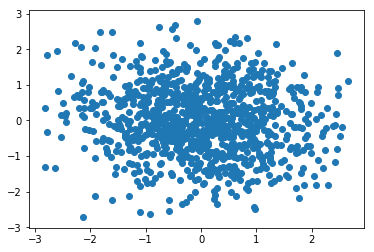

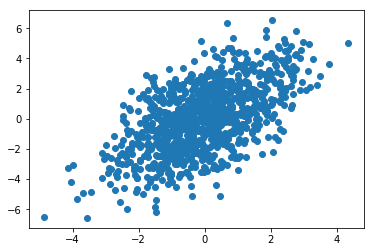

In [6]:
# Cas gaussien : s3 et s4 deux var gaussiennes 
s3= np.random.randn(1000)
s4= np.random.randn(1000)

plt.scatter(s3,s4)
plt.show()
# x3 et x4 des combinaisons lineaires de s1 et s2
x3=s3+s4
x4=2*s4-s2

plt.scatter(x3,x4)
plt.show()
# on ne peut pas determiner s3 et s4 a partir de x3 et x4

### Theoreme de la limite centrale

In [7]:
 # g var guassienne
g = np.random.randn(1000)

In [8]:
def sum_distributions(n):
    """
    fontion qui genere n var uniforme et compare la somme de 
    ces var a une gaussienne de meme variance
    """
    # n nombre de variables aléatoires a sommer
    s=np.ones((n,1000))
    for i in range(n):
        s[i]=np.random.uniform(-sqrt(3),sqrt(3),1000)  
    # r somme de n var suivant une loi uniforme
    r = np.sum(s,axis=0)/sqrt(n)

   
    # PDF de r
    fig=plt.figure()
    plt.subplot(2, 1, 1).set_title('n= %i'%n)
    sns.distplot(r, hist=True, kde=False, 
                 bins=int(180/5), color = 'darkblue')

    plt.subplot(2,1, 2).set_title('Gausienne')
    # PDF de g
    sns.distplot(g,bins=int(180/5),kde=False,color='red')
    plt.tight_layout()
    plt.show()

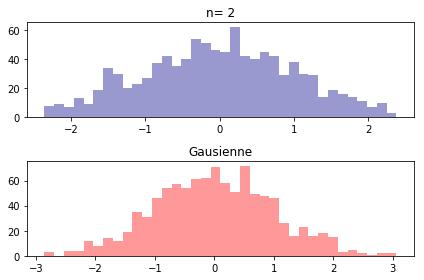

In [9]:
sum_distributions(2)

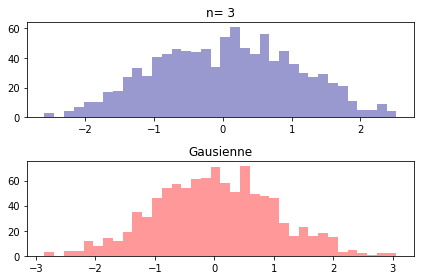

In [10]:
sum_distributions(3)

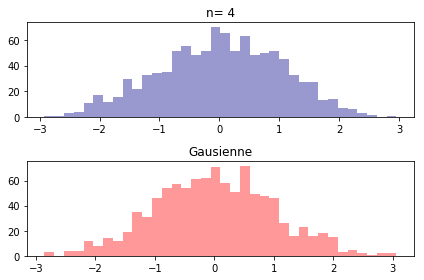

In [11]:
sum_distributions(4)

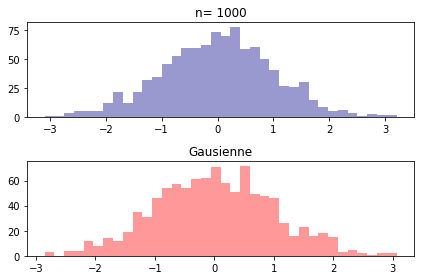

In [12]:
sum_distributions(1000)

#### plus on somme plus on s'approche d'une distribution gaussienne

# ICA 

## Recherche d'une seule composante independante

In [13]:
def ICA_one_component(x,nb_iter=100):
    """
    fonction qui prend en entrée une matrice de siganux mélangés et 
    retourne une estimation d'une seule composante en utilisant 
    l'algorithme ICA
    """
    # initialisation de w
    n = x.shape[0]
    w_v=rand(n)
    # nombre d'iterations
    n_done=0
    # condition de convergence
    stop = False
    while n_done < nb_iter and not(stop) :    
        # calcul de w+
        # g(w.T x)
        g=np.tanh(w_v.T@x)
        # E(x g(w.T x))
        e1=np.mean(x*g,axis=1)
        # g'(w.T x)
        g_prime=np.cosh(w_v.T @ x)
        # E(g'(w.T x)) * w
        e2 = np.mean(g_prime)*w_v
        # w = E(x g(w.T x)) -E(g'(w.T x)) * w
        w_plus = e1 - e2
        # normalisation de w_plus
        w_v = w_plus/np.linalg.norm(w_plus)

        # condition de convergence
        # E(x g(w.T x)) - β w =0
        β = e1/w_v
        stop = abs(β[0]-β[1]) < 10**-5
        n_done+=1
    return (w_v)

## Recherche de toutes les composantes independantes

In [14]:
def ICA_all_components(x, nb_iter=100):
    # initialisation of w
    n = x.shape[0] # dimension de la matrice w
    w = np.zeros((n,n))
    
    # w_1 : premier vecteur de w obtenu par la fonction ICA_one_component
    w_1 = ICA_one_component(x)
    w[0,:] = w_1
    # obtention des autres vecteurs de w 
    n_done = 1
    while n_done < n:
        # getting next column by applying ICA_one_component
        w_i = ICA_one_component(x)
        # orthogonalisation de w_i par le procédé de Gram-Schmidt
        w_i = w_i - w[:n_done,:]@w_i @w[:n_done,:]
        w_i = w_i/np.linalg.norm(w_i )
        w[n_done,:]=w_i
        n_done+=1

    return (w)

# Main

In [15]:
# importation des signaux melangés
input_1  = np.fromfile("files/In_1.txt", dtype=numpy.float64)
input_2  = np.fromfile("files/In_2.txt", dtype=numpy.float64)

## Pretraitement: blanchissement des signaux
x1=input_1
x2=input_2
# nombre d'elements dans x1
n=len(x1) 
# x matrice contenant les deux signaux x1 et x2
x=np.array([x1,x2])

# centralisation
x[0,:]=x[0,:]-x[0,:].mean()
x[1,:]=x[1,:]-x[1,:].mean()

# calcul de la matrice de covariance
E =np.dot(x,x.T)/n

# decomposition en valeurs propres
d,A = eig(E)
D = diag(sqrt(1/d))

#x_b signal blanchi
x_b = A @ D @ A.T @ x

## ICA
w = ICA_all_components(x_b)

# signal source
s=w@x_b

s1=s[0]
s2=s[1]

In [16]:
## Evaluation de performances: 

def quadratic_error(s,ref):
    err=1-(np.inner(ref,s)/(np.linalg.norm(ref)*np.linalg.norm(s)))**2
    err_db = 10*log(err)/log(10)
    return (err_db)

In [17]:
# Read reference signal files
ref1 = np.fromfile("files/Ref_1.txt", dtype=numpy.float64)
ref2 = np.fromfile("files/Ref_2.txt", dtype=numpy.float64)


err_1=quadratic_error(s1,ref1)
err_2=quadratic_error(s2,ref2)

print("erreur quadratique moyenne pour l'estimation de s1: %f  db" %err_1)
print("erreur quadratique moyenne pour l'estimation de s2: %f  db" %err_2)

erreur quadratique moyenne pour l'estimation de s1: -57.290388  db
erreur quadratique moyenne pour l'estimation de s2: -57.290389  db


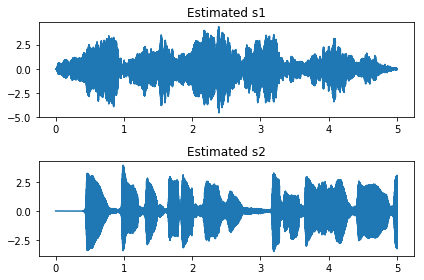

In [18]:
# representation des siganux source
fig = plt.figure()
plt.subplot(2,1,1).set_title("Estimated s1")
plt.plot(np.linspace(0, 5, len(s1)) ,s1)
plt.subplot(2,1,2).set_title("Estimated s2")
plt.plot(np.linspace(0, 5, len(s2)) ,s2)
plt.tight_layout()
plt.show()

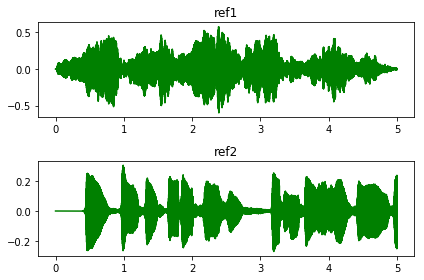

In [20]:
# Read reference signal files
ref1 = np.fromfile("files/Ref_1.txt", dtype=numpy.float64)
ref2 = np.fromfile("files/Ref_2.txt", dtype=numpy.float64)
fig = plt.figure()
plt.subplot(2,1,1).set_title("ref1")
plt.plot(np.linspace(0, 5, len(ref1)),ref1, color='g')
plt.subplot(2,1,2).set_title("ref2")
plt.plot(np.linspace(0, 5, len(ref2)) ,ref2, color='g')
plt.tight_layout()
plt.show()

In [21]:
from IPython.display import Audio
Audio(s1,rate=44100)

In [22]:
from IPython.display import Audio
Audio(s2,rate=44100)